In [214]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import sympy
sympy.init_printing()

4/4 BPF Response

In [285]:
z = sympy.symbols('z')

k, alpha, j, Ch, Cr = sympy.symbols('k, alpha, j, Ch, Cr')
H_44_z = k / (1 - (alpha + j*(1-alpha))*z**-1)
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_44_z, k, alpha = ')
H_44_z, k, alpha

H_44_z, k, alpha = 


In [286]:
#Variables
Ch = 20e-12
Cr = 75e-15
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

# Coefficients of the transfer function
b = [k]  # Numerator coefficients
a = [1, -1*(alpha + 1j - alpha*1j)]  # Denominator coefficients

# Sampling frequency
fs = 9.6e9 # Hz

# Frequencies from -pi to pi (normalized to -Nyquist to Nyquist)
omega = np.linspace(-np.pi, np.pi, 8192)

# Convert normalized frequencies (omega) to Hz
frequencies_1 = omega * fs / (2 * np.pi)

#Theoretical input impedance
Zo = 1 / (Cr * fs)
print('Zo = ', Zo)
#Theoretical cut frequency
fc = (fs / (2 * np.pi)) * np.arctan(Cr / Ch)
print('Fc = ', fc/1e6, ' MHz')
print('arctan(Cr / Ch) = ', np.arctan(Cr / Ch))
print('fs / (2 * np.pi) = ', fs / (2 * np.pi))


Zo =  1388.888888888889
Fc =  5.729551094138192  MHz
arctan(Cr / Ch) =  0.0037499824220233137
fs / (2 * np.pi) =  1527887453.6821952


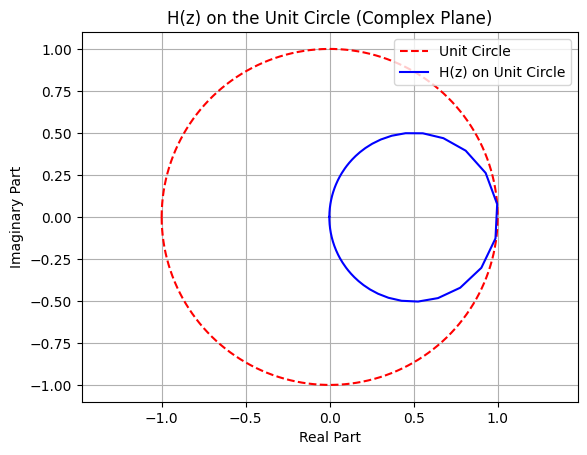

In [287]:
# Evaluate the transfer function H(z) on the unit circle, where z = exp(j*omega)
z = np.exp(1j * omega)
H_44 = np.polyval(b, z) / np.polyval(a, z)

# Normalize 
H_44 = H_44 / np.max(np.abs(H_44))

# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_44), np.imag(H_44), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()

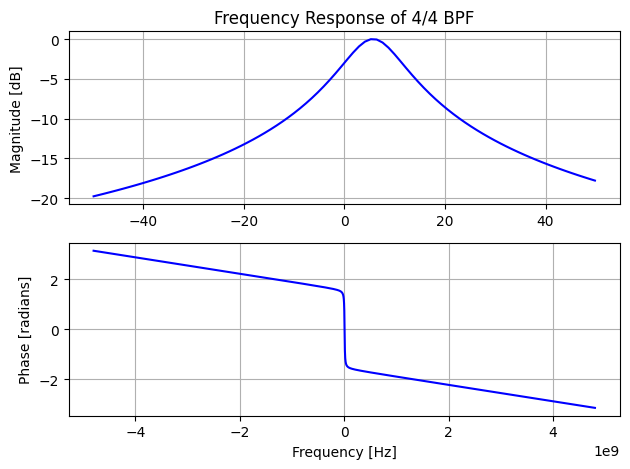

In [288]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask_1 = (frequencies_1 >= freq_range_min) & (frequencies_1 <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), 'b')
plt.title('Frequency Response of 4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_44))
plt.plot(frequencies_1, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()


4/8 BPF Filter Response

H_48_z, k, alpha = 


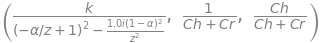

In [289]:
z = sympy.symbols('z')

k, alpha, j, Ch, Cr = sympy.symbols('k, alpha, j, Ch, Cr')
H_48_z = k / (((1 - alpha*z**(-1))**2) - ((((1 - alpha)*z**(-1))**2) * 1j))
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_48_z, k, alpha = ')
H_48_z, k, alpha

In [290]:
#Variables
Ch = 6.65e-12 
Cr = 500e-15 
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

# Coefficients of the transfer function
b = [k]  # Numerator coefficients
a = [1, -2*alpha, (alpha**2) + 2*alpha*1j - 1j - (alpha**2) * 1j]  # Denominator coefficients

# Sampling frequency
fs = 600e6 # Hz

# Frequencies from -pi to pi (normalized to -Nyquist to Nyquist)
omega = np.linspace(-np.pi, np.pi, 16384)

# Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

#Theoretical input impedance
Zo = 1 / (Cr * fs)
print('Zo = ', Zo)
#Theoretical cut frequency
fc = (fs / (2 * np.pi)) * np.arctan(((1 - alpha) * np.sin(np.pi / 4)) / (alpha + (1 - alpha) * np.cos(np.pi / 4)))
print('Fc = ', fc/1e6, ' MHz')
print('arctan(Cr / Ch) = ', np.arctan(Cr / Ch))
print('fs / (2 * np.pi) = ', fs / (2 * np.pi))

Zo =  3333.3333333333335
Fc =  4.816587210356899  MHz
arctan(Cr / Ch) =  0.07504676359644052
fs / (2 * np.pi) =  95492965.8551372


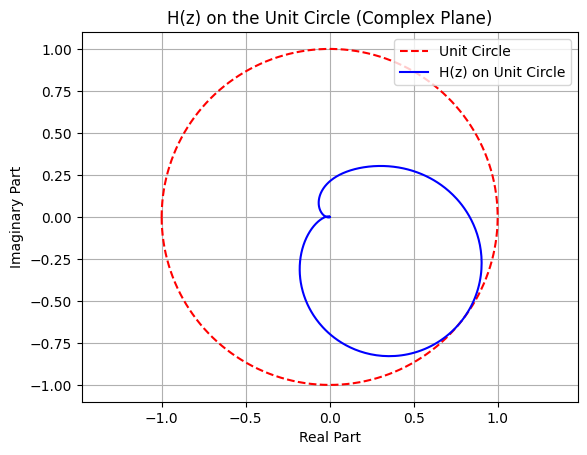

In [291]:
# Evaluate the transfer function H(z) on the unit circle, where z = exp(j*omega)
z = np.exp(1j * omega)
H_48 = np.polyval(b, z) / np.polyval(a, z)
# Normalize 
H_48 = H_48 / np.max(np.abs(H_48))

# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_48), np.imag(H_48), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

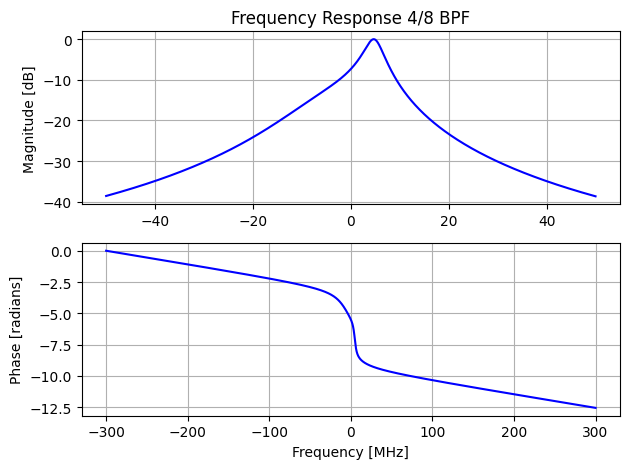

In [292]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask = (frequencies >= freq_range_min) & (frequencies <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_48[mask])), 'b')
plt.title('Frequency Response 4/8 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_48))
plt.plot(frequencies/1e6, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [MHz]')
plt.grid()
plt.tight_layout()

4/8 BPF with cross-connected transconductors

H_48_z, k, alpha = 


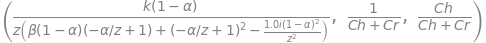

In [293]:
z = sympy.symbols('z')

beta, k, alpha, j, Ch, Cr = sympy.symbols('beta, k, alpha, j, Ch, Cr')
H_48_cc_z = (k * (1 - alpha) * z**-1) / (((1 - alpha*z**(-1))**2) + (((1 - alpha * z**-1) * (1 - alpha))*beta) - (((1 - alpha)**2)) * 1j * z**-2)
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)

print('H_48_z, k, alpha = ')
H_48_cc_z, k, alpha

In [297]:
#Variables
Ch = 6.65e-12 
Cr = 500e-15 
k = 1 / (Ch + Cr)
alpha = Ch / (Ch + Cr)
beta = -0.4

# Coefficients of the transfer function
b = [0, k*(1-alpha)]  # Numerator coefficients
a = [1 + beta - alpha*beta, beta*alpha**2 - 2*alpha - alpha*beta, alpha**2 + 2*alpha*1j - 1j - 1j*alpha**2]  # Denominator coefficients

# Sampling frequency
fs = 600e6 # Hz

# Frequencies from -pi to pi (normalized to -Nyquist to Nyquist)
omega = np.linspace(-np.pi, np.pi, 16384)

# Convert normalized frequencies (omega) to Hz
frequencies = omega * fs / (2 * np.pi)

#Theoretical input impedance
#Zo = 1 / (Cr * fs)
#print('Zo = ', Zo)
#Theoretical cut frequency
#fc = (fs / (2 * np.pi)) * np.arctan(((1 - alpha) * np.sin(np.pi / 4)) / (alpha + (1 - alpha) * np.cos(np.pi / 4)))
#print('Fc = ', fc/1e6, ' MHz')
#print('arctan(Cr / Ch) = ', np.arctan(Cr / Ch))
#print('fs / (2 * np.pi) = ', fs / (2 * np.pi))

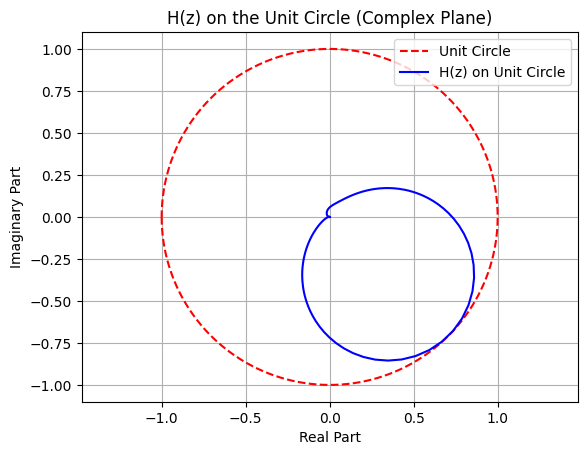

In [298]:
# Evaluate the transfer function H(z) on the unit circle, where z = exp(j*omega)
z = np.exp(1j * omega)
H_48_cc = np.polyval(b, z) / np.polyval(a, z)
# Normalize 
H_48_cc = H_48_cc / np.max(np.abs(H_48_cc))

# Unit circle in the complex plane
unit_circle = np.exp(1j * omega)

# Plot the unit circle
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'r--', label='Unit Circle')
# Plot H(z) on the complex plane
plt.plot(np.real(H_48_cc), np.imag(H_48_cc), 'b', label='H(z) on Unit Circle')
plt.title('H(z) on the Unit Circle (Complex Plane)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.axis('equal')  # Equal scaling on both axes
plt.legend()
plt.show()

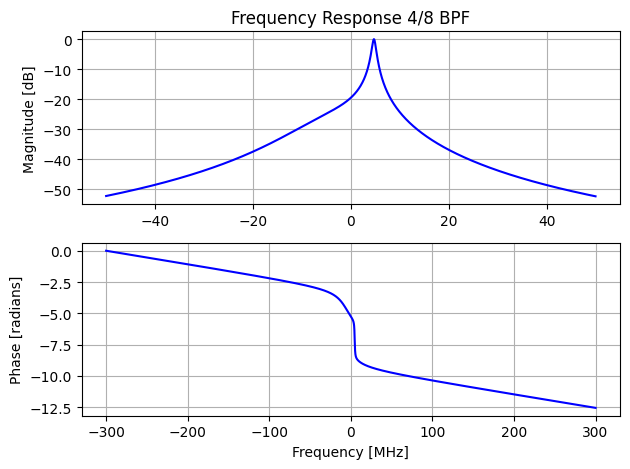

In [299]:
# Define the frequency range for plotting 
freq_range_min = -50e6
freq_range_max = 50e6  

# Apply the frequency range filter
mask = (frequencies >= freq_range_min) & (frequencies <= freq_range_max)

# Plot magnitude response
plt.subplot(2, 1, 1)
plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_48_cc[mask])), 'b')
plt.title('Frequency Response 4/8 BPF')
plt.ylabel('Magnitude [dB]')
plt.grid()

# Plot phase response
plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(H_48_cc))
plt.plot(frequencies/1e6, angles, 'b')
plt.ylabel('Phase [radians]')
plt.xlabel('Frequency [MHz]')
plt.grid()
plt.tight_layout()

Comparison

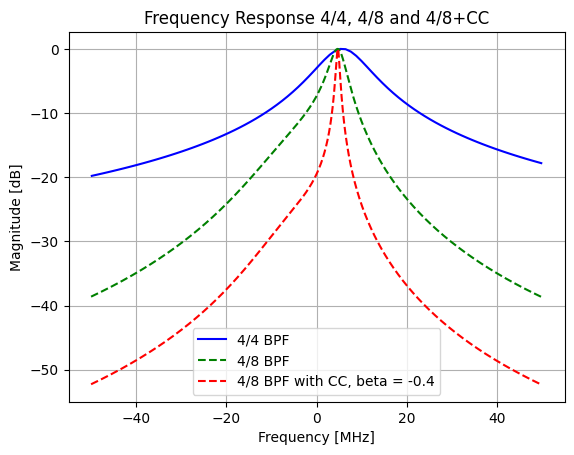

In [301]:
plt.plot(frequencies_1[mask_1]/1e6, 20 * np.log10(np.abs(H_44[mask_1])), 'b', label='4/4 BPF')
plt.ylabel('Magnitude [dB]')
plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_48[mask])), 'g--', label='4/8 BPF')
plt.plot(frequencies[mask]/1e6, 20 * np.log10(np.abs(H_48_cc[mask])), 'r--', label='4/8 BPF with CC, beta = -0.4')
plt.grid()
plt.xlabel('Frequency [MHz]')
plt.title('Frequency Response 4/4, 4/8 and 4/8+CC')
plt.legend()